In [201]:
#Project
import mysql.connector
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
from ipywidgets import interact

cf.go_offline()
conn = mysql.connector.connect(
   host="localhost",
   user="root",
   passwd="",
   database='burmese_python_project')


df_gov = pd.read_sql_query(
'''select *
from pythons''', conn)

df_gov.head(5)


,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,Latitude,Longitude,Datum,CoordAcc,Method,DataType,LocalOwner,Habitat,Locality,Site,InfestAcre,GrossAcre,Abundance,Density,NumCollect,Percentcov,TreatArea,TreatComm,Quantity,QuantityU,TrapType,NumTraps,Comments,VisitType,CollectTme,Surveyor,RecSource,RecOwner,RecSrcTyp,OrigName,Nativity,Host,Host_Name,VerifyMthd,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference
0,8303498,Travis Mangione FWC,Burmese python,Python molurus ssp. bivittatus,Positive,24 Nov 2019,,26 Nov 2019,,"Miami-Dade, Florida, United States",25.76191,-80.74829,WGS84,,,,,,"Man found and killed the python ""just before t...",,,,,,,,,,,,,,Hunter found and killed python just outside of...,,,,,Unknown,Web Report,,Introduced,,,Reporter Expertise,Credible,Verified,FWCC Exotic Species Database,05 Dec 2019,,,0,,,
1,8303147,Edward F. Metzger III,Burmese python,Python molurus ssp. bivittatus,Positive,20 Nov 2019,,22 Nov 2019,22 Nov 2019,"Broward, Florida, United States",26.29298,-80.50567,WGS84,0,Google Maps GPS,,,,,,,,,,,,,,,,,,Yearling roadkill,,5,,,Unknown,Android,,Introduced,,,Photographs,Verified,Verified,FWCC Exotic Species Database,05 Dec 2019,,,,,,
2,8298008,Michael Reupert NPS Big Cypress National Pres...,Burmese python,Python molurus ssp. bivittatus,Positive,07 Nov 2019,,12 Nov 2019,,"Collier, Florida, United States",25.86434,-81.10691,WGS84,,,,,Edge: Roadside ...,Hy 41 south in BICY,,,,,,,,,,,,,,Dispatch ed by BICY Python agents,,,,,Unknown,Web Report,,Introduced,,,Reporter Expertise,Credible,Verified,FWCC Exotic Species Database,14 Nov 2019,,,0,HQ freezer ...,,
3,8295649,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,06 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",25.83131,-80.90326,WGS84,,,,,,Big Cypress National Preserve,,,,,,,,,,,,,,"collected by T Hobbs, euthanized by NPS",,,,,Unknown,Web Report,,Introduced,,,Reporter Expertise,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,
4,8295647,"matthew mccollister National Park Service, Big...",Burmese python,Python molurus ssp. bivittatus,Positive,05 Nov 2019,,07 Nov 2019,,"Collier, Florida, United States",25.87197,-81.18223,WGS84,,,,,,Big Cypress National Preserve,,,,,,,,,,,,,,"female, collected by P Hobbs, euthanized by NPS",,,,,Unknown,Web Report,,Introduced,,,Reporter Expertise,Credible,Verified,FWCC Exotic Species Database,08 Nov 2019,,,0,,,


In [202]:
df_gov['County'] = df_gov['Location'].apply(lambda x: x.split(',')[0])
df_gov['ObsDate'] =  pd.to_datetime(df_gov['ObsDate'])
df_gov['ObsDate_Year']=df_gov['ObsDate'].dt.year
df_gov['ObsDate_Month']=df_gov['ObsDate'].dt.month
df_gov['ObsDate_Day']=df_gov['ObsDate'].dt.day


## Are sightings of Burmese pythons in the wild increasing? 

In [203]:
by_year=df_gov.groupby(['ObsDate_Year'])['objectid'].agg('count')
by_year.iplot(kind='line',
    xTitle = 'Year',
    yTitle = 'Number of Observations',
    title= 'Total Number of Observations per Year')

## Which three counties are most affected?

In [204]:
df_gov['County'] = df_gov['Location'].apply(lambda x: x.split(',')[0])
ax = df_gov['County'].value_counts(ascending = False)[:3].iplot(
    kind = 'bar',
    color = 'orange',
    width = 0.5
) 

## Expected number of 2019 sights

In [205]:
df_gov.index = pd.to_datetime(df['ObsDate'])
time_df = df
time_df.sort_index(inplace = True)
time_df.head(5)

,objectid,user.name,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,Latitude,Longitude,Datum,CoordAcc,Method,DataType,LocalOwner,Habitat,Locality,Site,InfestAcre,GrossAcre,Abundance,Density,NumCollect,Percentcov,TreatArea,TreatComm,Quantity,QuantityU,TrapType,NumTraps,Comments,VisitType,CollectTme,Surveyor,RecSource,RecOwner,RecSrcTyp,OrigName,Nativity,Host,Host_Name,VerifyMthd,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference,County,ObsDate_Year,ObsDate_Month,ObsDate_Day
ObsDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979-10-24,3067952,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1979-10-24,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.75931,-80.58911,WGS84,,Reported,Point,,,"Miami-Dade County, US-41 appx 8.53 km E of L-67",,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1979,10,24
1995-12-12,615739,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1995-12-12,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.22278,-80.83895,WGS84,,GoogleEarth 4.2.x,Point,,,"Everglades National Park, Main Park Road, 1.0 ...",,,,,,2,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Voucher Specimens,Verified,Verified,,,,,,Florida Museum of Natural History ...,"UF 146714, 147499 ...",Florida Museum of Natural History. Herpetolog...,Miami-Dade,1995,12,12
1996-02-12,3067680,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1996-02-12,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.26356,-80.79909,WGS84,,Reported,Point,,,"Everglades National Park, Main Park Rd appx 99...",,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1996,2,12
1996-11-18,3067679,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1996-11-18,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.64142,-80.57588,WGS84,,Reported,Point,,,East Everglades Shooting Range,,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1996,11,18
1997-11-03,615765,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1997-11-03,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.38235,-80.60954,WGS84,,DeLorme Topo USA,Point,,,"Everglades National Park, Paradise Key, Royal ...",,,,,,1,,,,,,,,"Collected by Walter E. Meshaka, Jr. et al.",,,,,State Agency,Bulk Data,,Introduced,,,Voucher Specimens,Verified,Verified,,,,,,Florida Museum of Natural History Herpetology ...,UF 147495 ...,Florida Museum of Natural History. Herpetology...,Miami-Dade,1997,11,3


In [206]:
target = time_df.loc['2019']
target.head(5)

,objectid,user.name,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,Latitude,Longitude,Datum,CoordAcc,Method,DataType,LocalOwner,Habitat,Locality,Site,InfestAcre,GrossAcre,Abundance,Density,NumCollect,Percentcov,TreatArea,TreatComm,Quantity,QuantityU,TrapType,NumTraps,Comments,VisitType,CollectTme,Surveyor,RecSource,RecOwner,RecSrcTyp,OrigName,Nativity,Host,Host_Name,VerifyMthd,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference,County,ObsDate_Year,ObsDate_Month,ObsDate_Day
ObsDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,8249408,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,2019-01-02,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.33997,-80.81290,WGS84,,,,,,,,,,,,1,,,,,,,,"B. Mason, S. Cooke, M. Martin",Capture,,UF FL Research Education Center,,State Agency,Bulk Data,Python molurus bivittatus,Introduced,,,Specimens,Verified,Verified,,,,,,,,,Miami-Dade,2019,1,2
2019-01-02,8250994,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,2019-01-02,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.73368,-80.67275,WGS84,,,,,,,,,,,,1,,,,,,,,,Capture,,Donna Kalil,,State Agency,Bulk Data,Python molurus bivittatus,Introduced,,,Specimens,Verified,Verified,,,,,,,,,Miami-Dade,2019,1,2
2019-01-04,8250999,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,2019-01-04,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.73535,-80.67283,WGS84,,,,,,,,,,,,1,,,,,,,,,Capture,,Donna Kalil,,State Agency,Bulk Data,Python molurus bivittatus,Introduced,,,Specimens,Verified,Verified,,,,,,,,,Miami-Dade,2019,1,4
2019-01-04,8250985,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,2019-01-04,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.73313,-80.67275,WGS84,,,,,,,,,,,,1,,,,,,,,,Capture,,Donna Kalil,,State Agency,Bulk Data,Python molurus bivittatus,Introduced,,,Specimens,Verified,Verified,,,,,,,,,Miami-Dade,2019,1,4
2019-01-05,8251407,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Treated,2019-01-05,,03 Aug 2019,,"Miami-Dade, Florida, United States",25.86322,-80.84376,WGS84,,,,,,,,,,,,1,,,,,,,,,Capture,,Bill Booth,,State Agency,Bulk Data,Python molurus bivittatus,Introduced,,,Specimens,Verified,Verified,,,,,,,,,Miami-Dade,2019,1,5


In [207]:
#now collect everything before 2019 as my training data
begin = pd.Timestamp('1979-10-24')
end = pd.Timestamp('2018-12-31') # should adjust to july 31 2019 to account for the data gathered this year?
training = time_df.truncate(before=begin, after=end)
training.head(5)

,objectid,user.name,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,Latitude,Longitude,Datum,CoordAcc,Method,DataType,LocalOwner,Habitat,Locality,Site,InfestAcre,GrossAcre,Abundance,Density,NumCollect,Percentcov,TreatArea,TreatComm,Quantity,QuantityU,TrapType,NumTraps,Comments,VisitType,CollectTme,Surveyor,RecSource,RecOwner,RecSrcTyp,OrigName,Nativity,Host,Host_Name,VerifyMthd,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference,County,ObsDate_Year,ObsDate_Month,ObsDate_Day
ObsDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979-10-24,3067952,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1979-10-24,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.75931,-80.58911,WGS84,,Reported,Point,,,"Miami-Dade County, US-41 appx 8.53 km E of L-67",,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1979,10,24
1995-12-12,615739,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1995-12-12,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.22278,-80.83895,WGS84,,GoogleEarth 4.2.x,Point,,,"Everglades National Park, Main Park Road, 1.0 ...",,,,,,2,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Voucher Specimens,Verified,Verified,,,,,,Florida Museum of Natural History ...,"UF 146714, 147499 ...",Florida Museum of Natural History. Herpetolog...,Miami-Dade,1995,12,12
1996-02-12,3067680,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1996-02-12,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.26356,-80.79909,WGS84,,Reported,Point,,,"Everglades National Park, Main Park Rd appx 99...",,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1996,2,12
1996-11-18,3067679,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1996-11-18,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.64142,-80.57588,WGS84,,Reported,Point,,,East Everglades Shooting Range,,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1996,11,18
1997-11-03,615765,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,1997-11-03,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.38235,-80.60954,WGS84,,DeLorme Topo USA,Point,,,"Everglades National Park, Paradise Key, Royal ...",,,,,,1,,,,,,,,"Collected by Walter E. Meshaka, Jr. et al.",,,,,State Agency,Bulk Data,,Introduced,,,Voucher Specimens,Verified,Verified,,,,,,Florida Museum of Natural History Herpetology ...,UF 147495 ...,Florida Museum of Natural History. Herpetology...,Miami-Dade,1997,11,3


In [208]:
training.drop(columns = 'ObsDate', axis = 1, inplace = True)
training.head(5)

,objectid,user.name,ComName,SciName,OccStatus,DateAcc,DateEnt,DateUp,Location,Latitude,Longitude,Datum,CoordAcc,Method,DataType,LocalOwner,Habitat,Locality,Site,InfestAcre,GrossAcre,Abundance,Density,NumCollect,Percentcov,TreatArea,TreatComm,Quantity,QuantityU,TrapType,NumTraps,Comments,VisitType,CollectTme,Surveyor,RecSource,RecOwner,RecSrcTyp,OrigName,Nativity,Host,Host_Name,VerifyMthd,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference,County,ObsDate_Year,ObsDate_Month,ObsDate_Day
ObsDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979-10-24,3067952,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.75931,-80.58911,WGS84,,Reported,Point,,,"Miami-Dade County, US-41 appx 8.53 km E of L-67",,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1979,10,24
1995-12-12,615739,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.22278,-80.83895,WGS84,,GoogleEarth 4.2.x,Point,,,"Everglades National Park, Main Park Road, 1.0 ...",,,,,,2,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Voucher Specimens,Verified,Verified,,,,,,Florida Museum of Natural History ...,"UF 146714, 147499 ...",Florida Museum of Natural History. Herpetolog...,Miami-Dade,1995,12,12
1996-02-12,3067680,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.26356,-80.79909,WGS84,,Reported,Point,,,"Everglades National Park, Main Park Rd appx 99...",,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1996,2,12
1996-11-18,3067679,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,17 Oct 2013,,"Miami-Dade, Florida, United States",25.64142,-80.57588,WGS84,,Reported,Point,,,East Everglades Shooting Range,,,,,,1,,,,,,,,,,,,,State Agency,Bulk Data,,Introduced,,,Expertise,Verified,Verified,,,,,,...,,U. S. Geological Survey. 2012. USGS Everglades...,Miami-Dade,1996,11,18
1997-11-03,615765,FWCC Exotic Species Database Florida Fish and ...,Burmese python,Python molurus ssp. bivittatus,Positive,,03 May 2009,03 May 2009,"Miami-Dade, Florida, United States",25.38235,-80.60954,WGS84,,DeLorme Topo USA,Point,,,"Everglades National Park, Paradise Key, Royal ...",,,,,,1,,,,,,,,"Collected by Walter E. Meshaka, Jr. et al.",,,,,State Agency,Bulk Data,,Introduced,,,Voucher Specimens,Verified,Verified,,,,,,Florida Museum of Natural History Herpetology ...,UF 147495 ...,Florida Museum of Natural History. Herpetology...,Miami-Dade,1997,11,3


In [209]:
training.reset_index(inplace = True)
training_pivot = pd.pivot_table(training, index = 'ObsDate', values = 'objectid', aggfunc = 'count' )
training_pivot.index = pd.to_datetime(training_pivot.index) # doesn't work because the dtype of the index is '<M8[ns]', not "Datetime"
# training_pivot = training_pivot.resample('D')
training_pivot2 = training_pivot.resample('D').count().fillna(0)

In [210]:
target.drop(columns = 'ObsDate', axis = 1, inplace = True)
target.reset_index(inplace = True)
target_pivot = pd.pivot_table(target, index = 'ObsDate', values = 'objectid', aggfunc = 'count' )
# target.index = pd.to_datetime(target_pivot.index)
target_pivot2 = target_pivot.resample('D').count().fillna(0)
target_pivot2.head(5)

,objectid
ObsDate,
2019-01-02,1
2019-01-03,0
2019-01-04,1
2019-01-05,1
2019-01-06,0


In [211]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(
    training_pivot2,
    freq = 'D', # daily frequency
    order = (2, 1),
).fit()
predictions = model.predict(
    start = len(training_pivot2), # in terms of index, where do we want to start and end? start at the END of your training data
    end = len(training_pivot2) + len(target_pivot2) - 1, # and end at the END of our testing data
)
round(predictions.sum()) # expected number of python sightings 2019

204.0

## Are there geographic hotspots? If so, what are the probabilities that volunteers will find pythons in those areas between today's date and Dec 31st?

In [212]:
# from this Time-Series data above, work on Probability of finding snakes in the geographic hotspots between now and Dec 31
# group the data by Month-day, ignoring the year,
# 
# a python was sighted on this day for x out of the total years, 
# sum the probabilities for today's date through 12/31
# first need to review git. i need the counties data from elda, how can I make sure I effectively merge that with my own code? 
# based on 2018's December data,
# every day is a success/failure for those days
# probability for 2018 - days of success / total days
# apply that prob to 2019, with the remaining days
last_year = time_df.loc['2018-12']
last_year.drop(columns = 'ObsDate', axis = 1, inplace = True)
last_year_ridx = last_year.reset_index()
last_year_pivot = pd.pivot_table(last_year_ridx, index = 'ObsDate', values = 'objectid', aggfunc = 'count' )

In [213]:
# every day had multiple python sightings in Dec2018,
# so my PRIORS would be the number of python sightings that day, divided by the total number of sightings that month?
# subset down to "so far this month" first
month_remaining2018 = last_year_pivot.loc['2018-12-14':]
month_remaining2018_ridx = month_remaining2018.reset_index()
days_remaining = len(month_remaining2018)
month_remaining2018_ridx['percSnake'] = month_remaining2018_ridx['objectid'] / int(days_remaining)
month_remaining2018_ridx.head(5)

,ObsDate,objectid,percSnake
0,2018-12-14,3,0.1875
1,2018-12-15,2,0.1250
2,2018-12-16,4,0.2500
3,2018-12-17,1,0.0625
4,2018-12-19,4,0.2500


In [214]:
def bayes_theorem(priors: list, likelihoods: list) -> np.array: # each should be a list, returns an array
    marginal_prob = sum(np.multiply(priors, likelihoods))
    posterior_prob = np.divide(np.multiply(priors, likelihoods), marginal_prob)
    return posterior_prob
priors = [1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, 1/16, ] # same probability for every remaining day, of which there are 16
likelihoods = list(month_remaining2018_ridx['percSnake']) # likelihood of finding snakes that day
bayes_theorem(priors, likelihoods)
# sum(bayes_theorem(priors, likelihoods)) # sum the probabilities is equal to one. this is "given that a python was sighted between now and EOY, what is the probability it was on a specific day of the month, based on 2018 December data"
# this also fails to account for the geographic hotspots, I need to have subsetted the data down to those three counties before calculating likelihoods

array([0.08571429, 0.05714286, 0.11428571, 0.02857143, 0.11428571,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.11428571, 0.08571429, 0.08571429, 0.05714286,
       0.08571429])

In [215]:
month_remaining2018_ridx['Prob_by_Day2019'] = pd.Series(bayes_theorem(priors, likelihoods))
#month_remaining2018_ridx.drop(columns = 'Prob_by_Day', axis = 1, inplace = True)
month_remaining2018_ridx.head(5)

,ObsDate,objectid,percSnake,Prob_by_Day2019
0,2018-12-14,3,0.1875,0.085714
1,2018-12-15,2,0.1250,0.057143
2,2018-12-16,4,0.2500,0.114286
3,2018-12-17,1,0.0625,0.028571
4,2018-12-19,4,0.2500,0.114286


In [216]:
from scipy.stats import sem, t
def conf_interval(sample, confidence):
    return t.interval(
        confidence, # confidence level, passed in as an argument
        len(sample) - 1, # degrees of freedom
        loc = sample.mean(),
        scale = sem(sample),
    )
conf_interval(bayes_theorem(priors, likelihoods), 0.9) # 90% confidence
# We are 90% confident that the average probability of python sightings is between 0.47 and 0.78

(0.04718531886071421, 0.07781468113928579)

## Are sightings cyclical? (Analysis + viz)

Analysis: It is important to understand the difference between "seasonal" and "cyclical". 
Seasonal data is impacted by the seasons
<br> Cyclical data fluctuates without a fixed time period
In this case, as we see in the below graphs, we believe that the data is seasonal, the fluctuations occur at a fixed time period.

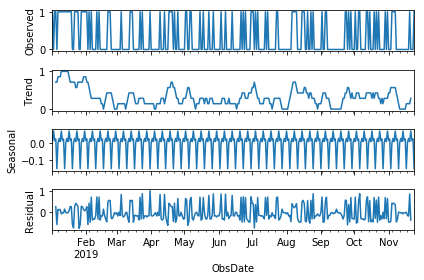

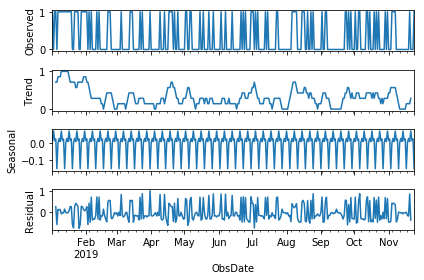

In [217]:
# code starts here
from statsmodels.tsa.seasonal import seasonal_decompose
my_graph = seasonal_decompose(target_pivot2)
my_graph.plot()

In [218]:
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
from math import ceil 
import calendar

url='https://www.inaturalist.org/observations.json?page=1&placeid=21&taxon_id = 238252'
response = requests.get(url)
results_init = response.json()

#Stores response into a dataframe object
data_init = pd.DataFrame(results_init)
data_init.head(10)

#Flatten dataframe 
flattened_data_init = json_normalize(results_init)
flattened_data_init


,cached_votes_total,captive,comments_count,community_taxon_id,created_at,created_at_utc,delta,description,faves_count,geoprivacy,iconic_taxon.ancestry,iconic_taxon.id,iconic_taxon.name,iconic_taxon.rank,iconic_taxon.rank_level,iconic_taxon_id,iconic_taxon_name,id,id_please,identifications_count,last_indexed_at,latitude,license,location_is_exact,longitude,map_scale,mappable,num_identification_agreements,num_identification_disagreements,oauth_application_id,observation_photos_count,observation_sounds_count,observed_on,observed_on_string,old_uuid,out_of_range,owners_identification_from_vision,photos,place_guess,positional_accuracy,positioning_device,positioning_method,private_latitude,private_longitude,private_place_guess,private_positional_accuracy,public_positional_accuracy,quality_grade,short_description,site_id,species_guess,tag_list,taxon.ancestry,taxon.common_name,taxon.common_name.id,taxon.common_name.is_valid,taxon.common_name.lexicon,taxon.common_name.name,taxon.id,taxon.name,taxon.rank,taxon_geoprivacy,taxon_id,time_observed_at,time_observed_at_utc,time_zone,timeframe,updated_at,updated_at_utc,uri,user.login,user.user_icon_url,user_id,user_login,uuid,zic_time_zone
0,0,False,0,NaN,2019-12-14T21:21:12.619Z,2019-12-14T21:21:12.619Z,False,None,0,None,48460,47126.0,Plantae,kingdom,70.0,47126.0,Plantae,36652558,False,1,2019-12-14T21:21:14.808Z,32.95063333,CC-BY,False,-105.856645,None,True,0,0,3.0,0,0,2019-12-14,Sat Dec 14 2019 11:23:37 GMT-0700 (MST),None,None,True,[],"Lincoln National Forest, Cloudcroft, NM, US",4.0,None,None,None,None,None,None,4.0,casual,None,1,None,[],48460/47126/211194/47125/47124/47132/47148/901...,NaN,83097.0,True,English,alder-leaved mountain-mahogany,52378.0,Cercocarpus montanus,species,None,52378.0,2019-12-14T18:23:37.000Z,2019-12-14T18:23:37.000Z,Arizona,None,2019-12-14T21:21:12.677Z,2019-12-14T21:21:12.677Z,https://www.inaturalist.org/observations/36652558,ck2az,https://static.inaturalist.org/attachments/use...,264009,ck2az,3709cb6c-9fa8-4fde-92b7-5d325c8c2bd5,America/Phoenix
1,0,False,0,NaN,2019-12-14T21:21:07.352Z,2019-12-14T21:21:07.352Z,False,None,0,None,48460/1/2/355675,3.0,Aves,class,50.0,3.0,Aves,36652557,False,1,2019-12-14T21:21:16.926Z,37.7456926788,CC-BY-NC,False,-122.242080113,None,True,0,0,3.0,1,0,2019-12-14,Sat Dec 14 2019 13:19:55 GMT-0800 (PST),None,False,True,"[{'id': 57966534, 'user_id': 2369909, 'native_...","Parfait Ln, Alameda, CA, US",5.0,None,None,None,None,None,None,5.0,needs_id,None,1,None,[],48460/1/2/355675/3/67566/4929/597395/4933,NaN,6394.0,True,English,Snowy Egret,4940.0,Egretta thula,species,open,4940.0,2019-12-14T13:19:55.000Z,2019-12-14T13:19:55.000Z,UTC,None,2019-12-14T21:21:14.488Z,2019-12-14T21:21:14.488Z,https://www.inaturalist.org/observations/36652557,mmmirish,None,2369909,mmmirish,a6cac728-6fb2-4a71-bd63-85f9cd12f036,Etc/UTC
2,0,False,0,NaN,2019-12-14T21:21:01.049Z,2019-12-14T21:21:01.049Z,False,None,0,None,NaN,NaN,NaN,NaN,NaN,NaN,None,36652556,False,0,2019-12-14T21:21:10.303Z,None,CC-BY-NC-ND,False,None,None,False,0,0,2.0,1,0,None,None,None,None,None,"[{'id': 57966529, 'user_id': 1385297, 'native_...",None,NaN,None,None,None,None,None,None,NaN,casual,None,1,None,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,Hawaii,None,2019-12-14T21:21:09.099Z,2019-12-14T21:21:09.099Z,https://www.inaturalist.org/observations/36652556,victoriacabaleiro,https://static.inaturalist.org/attachments/use...,1385297,victoriacabaleiro,98732838-29c5-4a6f-b5c3-93531e9255e1,Pacific/Honolulu
3,0,False,0,NaN,2019-12-14T21:21:01.016Z,2019-12-14T21:21:01.016Z,False,None,0,None,48460,47170.0,Fungi,kingdom,70.0,47170.0,Fungi,36652555,False,1,2019-12-14T21:21:12.896Z,36.6156806946,None,False,-121.7047271729,None,True,0,0,2.0,1,0,2019-12-14,2019-12-14 11:41:09 AM PST,None,None,True,"[{'id': 57966531, 'user_id': 2182262, 'native_...","CORRAL DE TIE, CA 93908, USA",NaN,gps,gps,None,None,None,None,NaN,needs_id,None,1,Common Fieldcap,[],48460/47170/47169/50814/47167/785517/48768/118395,

In [219]:

pd.set_option('display.max_columns',None)

#Page count & append
url_metadata='https://api.inaturalist.org/v1/observations?verifiable=true&order_by=observations.id&order=desc&page=1&spam=false&place_id=21&taxon_id=238252&locale=en-US&per_page=24&return_bounds=true'
response_meta = requests.get(url_metadata)
results_pages = response_meta.json()

def getKeyVal(key):
    return results_pages[key]

def totalPages(key_total,key_page):
    total = getKeyVal(key_total)
    count = getKeyVal(key_page)
    return int(ceil(total/count))

pages = totalPages('total_results','per_page')

def appendData(pages):
    _url='https://api.inaturalist.org/v1/observations?'
    page_data=[]
    for page_num in range(1,pages +1):
        response = requests.get(_url+'page='+str(page_num)+'&place_id=21&taxon_id=238252')
        results = json_normalize(response.json()['results'])
        page_data.append(pd.DataFrame(results))
    return page_data

df_inat = pd.concat(appendData(pages))


### Which iNaturalist users are most active in sighting pythons?

In [239]:
df_inat[['user.id','user.login']].groupby('user.id').count().sort_values(by = 'user.login',ascending= False).head(5)

,user.login
user.id,
1484946,12
349183,6
8917,4
248231,4
2320836,4


### Which iNaturalist users are most active in identifying pythons? Hint: iNaturalist observations must be confirmed by other users.

In [234]:
df_test=df_inat[['id','user.name','quality_grade','reviewed_by']].reset_index()
df_test=df_test[df_test['quality_grade']== 'research']

In [235]:
lis_ids=[user for user_ls in df_test['reviewed_by']for user in user_ls]
df_usrs=pd.DataFrame(lis_ids)
print('Most active user_id:',(df_usrs[0].value_counts().head(1)))

Most active user_id: 947744    65
Name: 0, dtype: int64


## Are any wildlife officials also using iNaturalist? (Hint: yes)

In [223]:
#df_gov.rename(columns={'Reporter':'user.name'}, inplace= True)
#df_join=pd.merge(df,df_inat,on='user.name', how='inner')

In [225]:
## subset of inaturalistic data set with only user names
df_user_name=df_inat[['user.name','user.name_autocomplete']]
##list of unique usernames in inaturalistic data set
inat_u=df_user_name['user.name'].unique()
##Strip white spaces form Reporter column in pythons SQL data set
df_gov['Reporter']=[user.strip() for user in df_gov['Reporter']]
#Find values in pythons SQL data set that are in the user list from inaturalistic
df_gov[df_gov['Reporter'].isin(inat_u)]

,objectid,Reporter,ComName,SciName,OccStatus,ObsDate,DateAcc,DateEnt,DateUp,Location,Latitude,Longitude,Datum,CoordAcc,Method,DataType,LocalOwner,Habitat,Locality,Site,InfestAcre,GrossAcre,Abundance,Density,NumCollect,Percentcov,TreatArea,TreatComm,Quantity,QuantityU,TrapType,NumTraps,Comments,VisitType,CollectTme,Surveyor,RecSource,RecOwner,RecSrcTyp,OrigName,Nativity,Host,Host_Name,VerifyMthd,IDCred,Verified,Reviewer,ReviewDate,OrgSrcID,PID,Voucher,Museum,MuseumRec,Reference,County,ObsDate_Year,ObsDate_Month,ObsDate_Day
ObsDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-11-18,8295159,Joshua Sands,Burmese python,Python molurus ssp. bivittatus,Positive,2019-11-04,,04 Nov 2019,04 Nov 2019,"Monroe, Florida, United States",25.22318,-80.43027,WGS84,,,,,Edge: Roadside ...,,,,,,,,,,,,,,,,,,,,Unknown,Web Report,,Introduced,,,Photographs,Verified,Verified,FWCC Exotic Species Database,04 Nov 2019,,,0,,,,Monroe,2019,11,4
2002-12-05,8274950,Joshua Sands,Burmese python,Python molurus ssp. bivittatus,Positive,2019-09-24,,24 Sep 2019,24 Sep 2019,"Monroe, Florida, United States",25.20540,-80.42108,WGS84,,,,,Edge: Roadside ...,,,,,,,,,,,,,,,,,,,,Unknown,Web Report,,Introduced,,,Photographs,Verified,Verified,FWCC Exotic Species Database,30 Sep 2019,,,0,,,,Monroe,2019,9,24


## Visualize the network.